In [1]:
import sys
if '../..' not in sys.path:
    sys.path.append('../..')
    
import time
import numpy as np
from scipy import optimize

from functions import functionObj, functionObj_multiDim
from functions import exercise61, rosenbrock, exercise54
from models.optimizers import ConjugateGradientAlgorithm,\
                              FibonacciSearch,\
                              InexactLineSearch,\
                              BacktrackingLineSearch,\
                              FletcherReevesAlgorithm,\
                              QuasiNewtonAlgorithm,\
                              SteepestDescentAlgorithm
from run_exercises import run_exercise, plot_contour

## Exercício 6.1 do Antoniou

Use ConjugateGradientAlgorithm to minimize $f(x) = \frac{1}{2}\mathbf{x}^T\mathbf{Qx} + \mathbf{b}^T\mathbf{x}$

In [2]:
x_0 = np.zeros(16)
f_x = exercise61

print('-----------Non-linear Conjugate from Scipy-----------')

f_x_obj = functionObj(f_x)
start_time_scipy = time.process_time()
x_min, f_min, _, _, _, = optimize.fmin_cg(f_x_obj, x_0, full_output=True)
scipy_time_spent = time.process_time() - start_time_scipy
x_min = f_x_obj.best_x
f_min = f_x_obj.best_f
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x_obj.fevals, f_x_obj.grad_evals, f_x_obj.nevals))
print('Time: %f s'%scipy_time_spent)

print('-----------ConjugateDescentAlgorithm-----------')
f_x_obj = functionObj(f_x)

opt = ConjugateGradientAlgorithm(f_x_obj,x_0,  1e3, xtol=1e-6)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x_obj.best_x._value
f_min = f_x_obj.best_f._value
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x_obj.fevals, f_x_obj.grad_evals, f_x_obj.nevals))
print('Time: %f s'%conjugate_spent_time)


-----------Non-linear Conjugate from Scipy-----------
Optimization terminated successfully.
         Current function value: -0.119076
         Iterations: 17
         Function evaluations: 594
         Gradient evaluations: 33
x*:  [0.03423645132612283, 0.024233822238798948, 0.024233822278653335, 0.03423645137013724, -0.001433850150623133, -0.020886532038863797, -0.020886531997413776, -0.0014338500237585654, 0.0332204729263613, 0.02738491652753737, 0.027384916469662807, 0.033220472822708846, -0.006628741539532863, -0.004864945976906411, -0.004864931127518357, -0.00662874165495146]
F(x*):  -0.11907560047253418
Function evals: 594
Gradient evals: 0
All evals: 594
Time: 0.412917 s
-----------ConjugateDescentAlgorithm-----------
x*:  [ 0.03423704  0.02423337  0.02423337  0.03423704 -0.00143237 -0.02088798
 -0.02088798 -0.00143237  0.03321913  0.02738606  0.02738606  0.03321913
 -0.00663057 -0.00486331 -0.00486331 -0.00663057]
F(x*):  -0.119075600509808
Function evals: 9
Gradient evals: 9


O algoritmo Conjugate Descent implementado encontrou o mesmo $f(x^*)$ que o algoritmo Non-Linear Conjugate implementado na biblioteca pública SciPy. Para uma função quadrática, o Conjugate Descent Algorithm deveria resolver o problema em uma avaliação de função.

## Exercício 6.2

Use Fletcher-Reeves algorithm to find the minimizer of the Rosenbrock function.

$f(x)=100(x_2-x_1^2)^2+(1-x_1)^2$

Use $\epsilon = 10^{-6}$ and three initial points:

$\mathbf{x}_0 = [-2~~2]^T$
$\mathbf{x}_0 = [2~~-2]^T$
$\mathbf{x}_0 = [-2~~-2]^T$

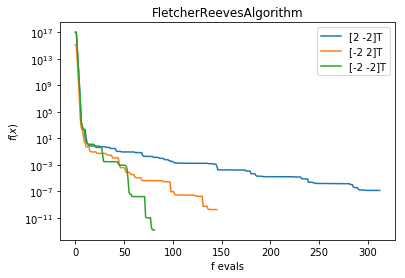

In [3]:
solution_62 = run_exercise(rosenbrock, opt=FletcherReevesAlgorithm, line_search=FibonacciSearch)

In [4]:
solution_62[['best_x', 'best_f', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_x,best_f,fevals,grad_evals,nevals,run_time (s)
[2 -2]T,"[0.999622162281289, 0.9992424615518044]",1.431637e-07,2409,73,2482,0.212877
[-2 2]T,"[1.0000136448989594, 1.0000273266043576]",1.863174e-10,4818,146,4964,0.390884
[-2 -2]T,"[1.0000003977056775, 1.0000007978700378]",1.587742e-13,396,12,408,0.030569


O algoritmo de FletcherReeves utilizando a busca em linha por Fibonacci encontrou o mínimo para todos os $x_0$. $x_0=[-2~~-2]^T$ atingiu o mínimo com menos avaliações e com menor erro em relação ao mínimo global $x^* = [1.0, 1.0]$.
O gráfico em [3] apresenta só as avaliações que modificaram o menor $f(x)$ encontrado.

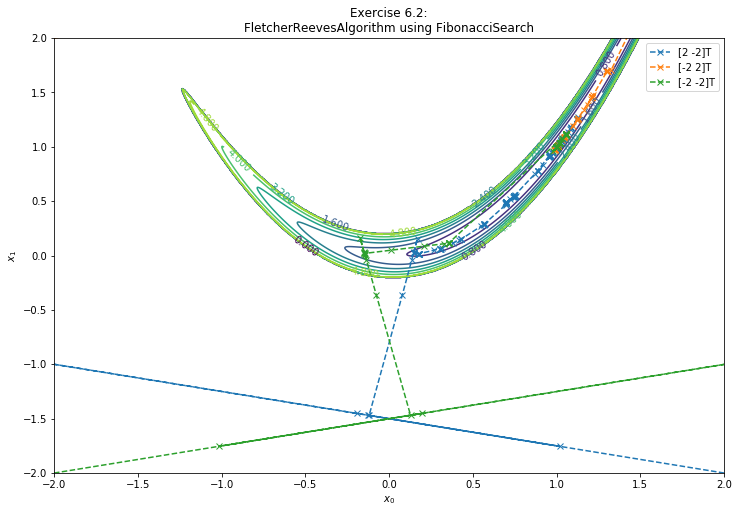

In [5]:
results_1 = np.array(solution_62.all_best_x['[2 -2]T'])
results_2 = np.array(solution_62.all_best_x['[-2 2]T'])
results_3 = np.array(solution_62.all_best_x['[-2 -2]T'])
name_1 = '[2 -2]T'
name_2 = '[-2 2]T'
name_3 = '[-2 -2]T'
title = 'Exercise 6.2:\nFletcherReevesAlgorithm using FibonacciSearch'
plot_contour(functionObj(rosenbrock), 
             region=([-2,2], [-2, 2]), 
             mask=5, 
             optimizers=[results_1, results_2, results_3], 
             names = [name_1, name_2, name_3],
             title=title)

O gráfico em [5] mostra a evolução do melhor $f(x)$ encontrado para cada $x_0$ utilizando o algoritmo de Fletcher-Reeves com a busca em linha Fibonacci.

## Exercício 6.3

minimize $f(x) = 5x_1^2-9x_1x_2+4.075x_2^2+x_1$

with $\mathbf{x}_0=[1~~1]^T$ and $\epsilon=3\times10^{-6}$

Solução encontrada utilizando máximo de 1000 iterações.

In [6]:
solution_63 = run_exercise(exercise54, opt=ConjugateGradientAlgorithm, plot_charts=False, maxIter=1e3)

In [7]:
f_x = functionObj(exercise54)
opt = SteepestDescentAlgorithm(func = f_x, x_0 = np.array([1.0, 1.0]),  xtol=3e-6)
sda_start_time = time.process_time()
opt.find_min()
sda_spent_time = time.process_time() - sda_start_time
x_min = f_x.best_x
f_min = f_x.best_f
print(SteepestDescentAlgorithm.__name__)
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%sda_spent_time)

results_sda = np.array(f_x.all_best_x)
name_sda = 'SteepestDescentAlgorithm without line search'

SteepestDescentAlgorithm
x*:  [-16.293973644671954, -17.993381119524216]
F(x*):  -8.14999888070452
Function evals: 2001
Gradient evals: 1000
All evals: 3001
Time: 0.821125 s


In [8]:
f_x = functionObj(exercise54)
opt = ConjugateGradientAlgorithm(func = f_x, x_0 = np.array([1.0, 1.0]),  xtol=3e-6)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x.best_x._value
f_min = f_x.best_f._value
print(ConjugateGradientAlgorithm.__name__)
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%conjugate_spent_time)

results_cga = np.array(f_x.all_best_x)
name_cga = 'ConjugateGradientAlgorithm'

ConjugateGradientAlgorithm
x*:  [-16.3 -18. ]
F(x*):  -8.149999999999824
Function evals: 3
Gradient evals: 3
All evals: 6
Time: 0.021231 s


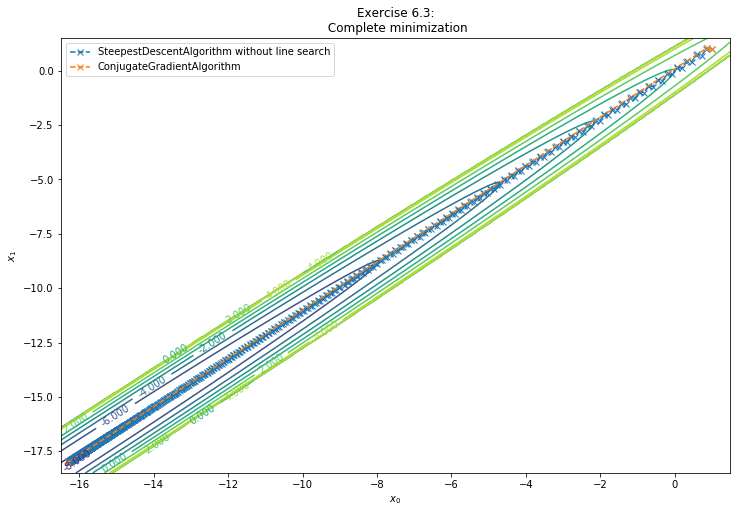

In [9]:
title = 'Exercise 6.3:\n Complete minimization'
results_cga = np.array(
    list(map(lambda x: list(map(lambda x: x if not hasattr(x, '_value') else x._value, x)), results_cga)))
plot_contour(f_x, 
             region=([-16.5,1.5], [-18.5, 1.5]), 
             mask=5, 
             optimizers=[results_sda, results_cga], 
             names=[name_sda, name_cga],
             title=title)

### a) Perform 1 iteration on ConjugateGradientAlgorithm and SteepestGradientAlgorithm

In [10]:
f_x_sda = functionObj(exercise54)
_=SteepestDescentAlgorithm(func = f_x_sda, x_0=np.array([1.0, 1.0]),  xtol=3e-6, maxIter=1).find_min()
f_x_cga = functionObj(exercise54)
_=ConjugateGradientAlgorithm(func=f_x_cga, x_0 = np.array([1.0, 1.0]),  xtol=3e-6, maxIter=1).find_min()

### b) Compare the results of the first iteration obtained by both algorithms

In [11]:
print('Melhores resultados da primeira iteração do SteepestDescentAlgorithm:\n f(x) = %.9f'%f_x_sda.best_f)
print(' x = ', f_x_sda.best_x)

Melhores resultados da primeira iteração do SteepestDescentAlgorithm:
 f(x) = 0.929213099
 x =  [0.876517183166723, 1.0524801971541426]


In [12]:
print('Melhores resultados da primeira iteração do ConjugateGradientAlgorithm:\n f(x) = %.9f'%f_x_cga.best_f._value)
print(' x = ', f_x_cga.best_x._value)

Melhores resultados da primeira iteração do ConjugateGradientAlgorithm:
 f(x) = 1.075000000
 x =  [1. 1.]


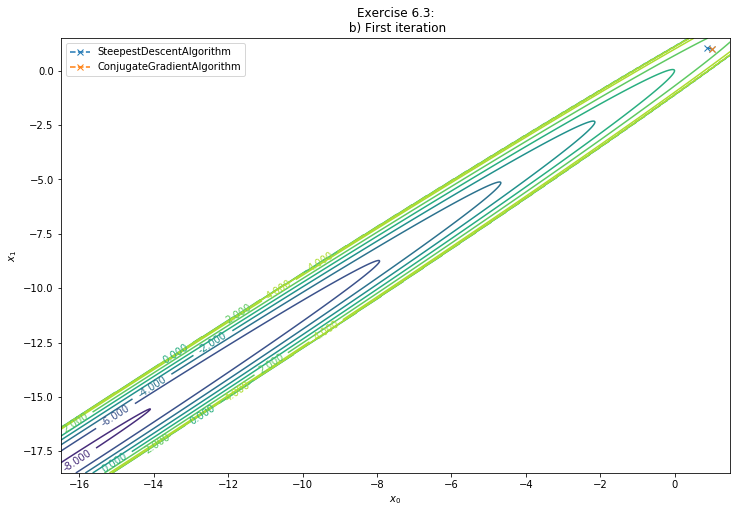

In [13]:
title = 'Exercise 6.3:\n b) First iteration'
results_sda = np.array(f_x_sda.all_best_x)
results_cga = np.array(f_x_cga.all_best_x)
results_cga = np.array(
    list(map(lambda x: list(map(lambda x: x if not hasattr(x, '_value') else x._value, x)), results_cga)))
name_sda = 'SteepestDescentAlgorithm'
name_cga = 'ConjugateGradientAlgorithm'
plot_contour(f_x_sda, 
             region=([-16.5,1.5], [-18.5, 1.5]), 
             mask=5, 
             optimizers=[results_sda, results_cga], 
             names=[name_sda, name_cga],
             title=title)

O SteepestDescentAlgorithm encontrou um mínimo menor na primeira iteração.

### c) Compare the results of the second iteration obtained by both algorithms.

In [14]:
f_x_sda = functionObj(exercise54)
_=SteepestDescentAlgorithm(func = f_x_sda, x_0=np.array([1.0, 1.0]),  xtol=3e-6, maxIter=2).find_min()
f_x_cga = functionObj(exercise54)
_=ConjugateGradientAlgorithm(func=f_x_cga, x_0 = np.array([1.0, 1.0]),  xtol=3e-6, maxIter=2).find_min()

In [15]:
print('Melhores resultados da segunda iteração do SteepestDescentAlgorithm:\n f(x) = %.9f'%f_x_sda.best_f)
print(' x = ', f_x_sda.best_x)

Melhores resultados da segunda iteração do SteepestDescentAlgorithm:
 f(x) = 0.785730136
 x =  [0.7266001755240615, 0.699734296818468]


In [16]:
print('Melhores resultados da segunda iteração do ConjugateGradientAlgorithm:\n f(x) = %.9f'%f_x_cga.best_f._value)
print(' x = ', f_x_cga.best_x._value)

Melhores resultados da segunda iteração do ConjugateGradientAlgorithm:
 f(x) = 0.929213099
 x =  [0.87651718 1.0524802 ]


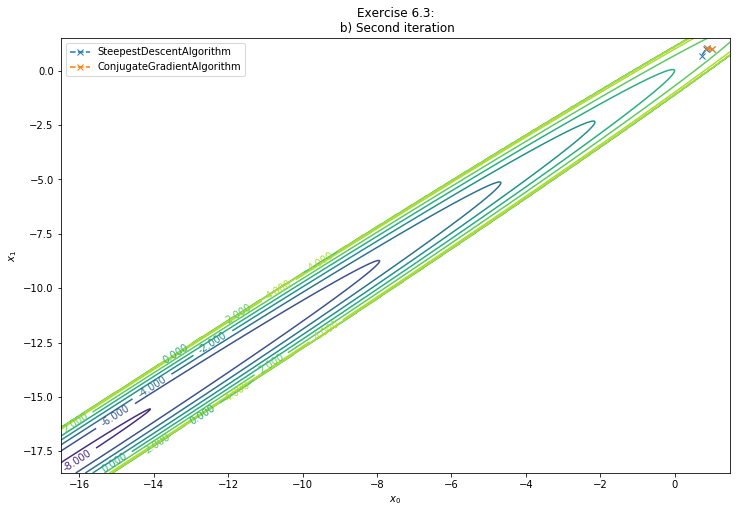

In [17]:
title = 'Exercise 6.3:\n b) Second iteration'
results_sda = np.array(f_x_sda.all_best_x)
results_cga = np.array(f_x_cga.all_best_x)
results_cga = np.array(
    list(map(lambda x: list(map(lambda x: x if not hasattr(x, '_value') else x._value, x)), results_cga)))
name_sda = 'SteepestDescentAlgorithm'
name_cga = 'ConjugateGradientAlgorithm'
plot_contour(f_x_sda, 
             region=([-16.5,1.5], [-18.5, 1.5]), 
             mask=5, 
             optimizers=[results_sda, results_cga], 
             names=[name_sda, name_cga],
             title=title)

Novamente o SteepestDescentAlgorithm encontrou um mínimo menor na segunda iteração. Porém, podemos ver pelo gráfico de [9] e os resultados em [8] que o ConjugateGradientAlgorithm encontra o mínimo da função na terceira iteração, enquanto o SteepestDescentAlgorithm necessita de mais iterações.

## Exercício 7.7

Implement a quasi-Newton algorithm based on the DFP formula and minimize:

$f(x)=100(x_2-x_1^2)^2+(1-x_1)^2$

Use $\epsilon = 10^{-6}$ and three initial points:

$\mathbf{x}_0 = [-2~~2]^T$
$\mathbf{x}_0 = [2~~-2]^T$
$\mathbf{x}_0 = [-2~~-2]^T$


Foram escolhidos os mesmos pontos iniciais que no exercício 6.2, para podermos comparar os resultados.

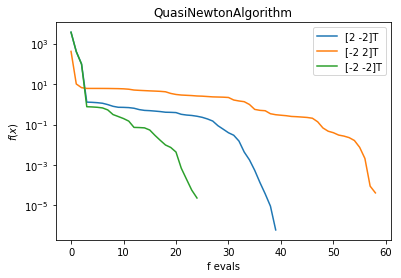

In [18]:
solution_77_DFP = run_exercise(rosenbrock, QuasiNewtonAlgorithm, formula='DFP')

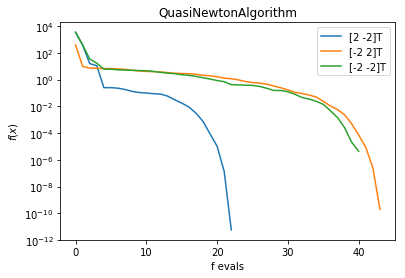

In [19]:
solution_77_BFGS = run_exercise(rosenbrock, QuasiNewtonAlgorithm, formula='BFGS')

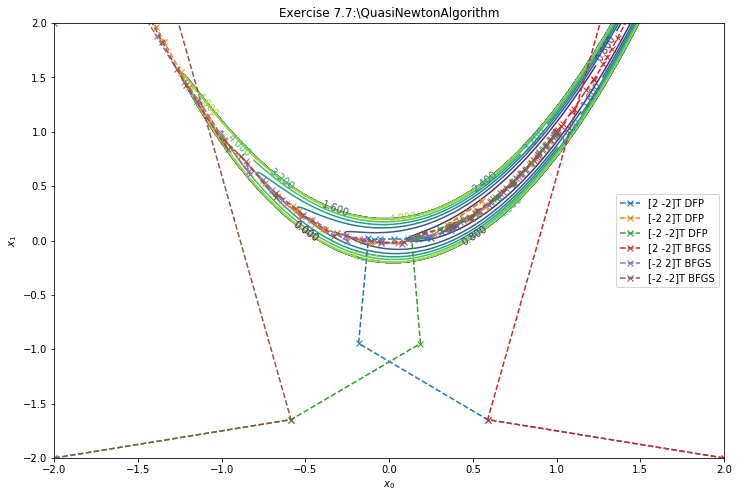

In [20]:
results_1 = np.array(solution_77_DFP.all_best_x['[2 -2]T'])
results_2 = np.array(solution_77_DFP.all_best_x['[-2 2]T'])
results_3 = np.array(solution_77_DFP.all_best_x['[-2 -2]T'])
results_4 = np.array(solution_77_BFGS.all_best_x['[2 -2]T'])
results_5 = np.array(solution_77_BFGS.all_best_x['[-2 2]T'])
results_6 = np.array(solution_77_BFGS.all_best_x['[-2 -2]T'])
name_1 = '[2 -2]T DFP'
name_2 = '[-2 2]T DFP'
name_3 = '[-2 -2]T DFP'
name_4 = '[2 -2]T BFGS'
name_5 = '[-2 2]T BFGS'
name_6 = '[-2 -2]T BFGS'
title = 'Exercise 7.7:\QuasiNewtonAlgorithm'
plot_contour(functionObj(rosenbrock), 
             region=([-2,2], [-2, 2]), 
             mask=5, 
             optimizers=[results_1, results_2, results_3, results_4, results_5, results_6], 
             names = [name_1, name_2, name_3, name_4, name_5, name_6],
             title=title)

### Compare the results with those obtained in Exercise 6.2

#### Resultado do QuasiNewton com DFP na minimização da função de Rosenbrock.

In [21]:
solution_77_DFP[['best_x', 'best_f', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_x,best_f,fevals,grad_evals,nevals,run_time (s)
[2 -2]T,"[1.0006104751973983, 1.0012711872028497]",6.213231e-07,56,2039,2095,1.155622
[-2 2]T,"[0.9944433187890923, 0.989249583948909]",4.190373e-05,80,2058,2138,1.089518
[-2 -2]T,"[0.9957373840446976, 0.9917225990189015]",2.344431e-05,34,2025,2059,1.066176


#### Resultado do QuasiNewton com BFGS na minimização da função de Rosenbrock.

In [22]:
solution_77_BFGS[['best_x', 'best_f', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_x,best_f,fevals,grad_evals,nevals,run_time (s)
[2 -2]T,"[0.9999978890274238, 0.999995887097943]",5.645148e-12,37,2027,2064,1.069981
[-2 2]T,"[0.9999904366992792, 0.9999798639392066]",1.933760e-10,54,2044,2098,1.132062
[-2 -2]T,"[1.0002026307799345, 1.0001969799541746]",4.380893e-06,49,2040,2089,1.141904


#### Resultado do Fletcher-Reeves Algorithm com Fibonacci Search na minimização da função de Rosenbrock.

In [23]:
solution_62[['best_x', 'best_f', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_x,best_f,fevals,grad_evals,nevals,run_time (s)
[2 -2]T,"[0.999622162281289, 0.9992424615518044]",1.431637e-07,2409,73,2482,0.212877
[-2 2]T,"[1.0000136448989594, 1.0000273266043576]",1.863174e-10,4818,146,4964,0.390884
[-2 -2]T,"[1.0000003977056775, 1.0000007978700378]",1.587742e-13,396,12,408,0.030569


Com essas tabelas, podemos verificar que o Fletcher-Reeves encontra os mínimos em menos tempo de processamento que os algoritmos de QuasiNewton, porém com maior quantidade de avaliações de função.

## Exercício 7.8

minimize $f(x) = 5x_1^2-9x_1x_2+4.075x_2^2+x_1$

with $\mathbf{x}_0=[0~~0]^T$ and $\epsilon=3\times10^-7$

In [24]:
f_x = functionObj(exercise54)
opt = QuasiNewtonAlgorithm(func = f_x, x_0 = np.array([0.0, 0.0]), formula='BFGS', xtol=3e-7)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x.best_x
f_min = f_x.best_f
print(QuasiNewtonAlgorithm.__name__ + ' with BFGS')
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%conjugate_spent_time)
result_bfgs = np.array(f_x.all_best_x)
name_bfgs = '[0.0, 0.0] BFGS'

QuasiNewtonAlgorithm with BFGS
x*:  [-16.299999999999624, -17.99999999999958]
F(x*):  -8.149999999999988
Function evals: 5
Gradient evals: 2004
All evals: 2009
Time: 1.352772 s


In [25]:
f_x = functionObj(exercise54)
opt = QuasiNewtonAlgorithm(func = f_x, x_0 = np.array([0.0, 0.0]), formula='DFP', xtol=3e-7)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x.best_x
f_min = f_x.best_f
print(QuasiNewtonAlgorithm.__name__ + ' with DFP')
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%conjugate_spent_time)
result_DFP = np.array(f_x.all_best_x)
name_DFP = '[0.0, 0.0] DFP'

QuasiNewtonAlgorithm with DFP
x*:  [-16.300000000000043, -18.000000000000046]
F(x*):  -8.149999999999725
Function evals: 5
Gradient evals: 2004
All evals: 2009
Time: 1.495161 s


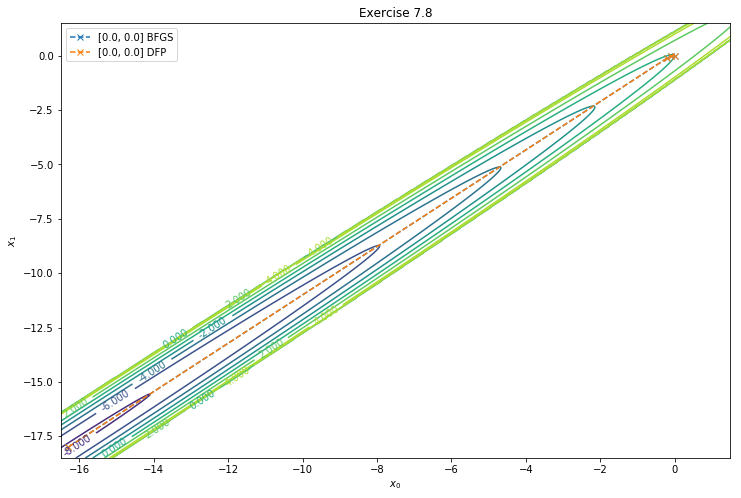

In [26]:
title = 'Exercise 7.8'
results_cga = np.array(
    list(map(lambda x: list(map(lambda x: x if not hasattr(x, '_value') else x._value, x)), results_cga)))
plot_contour(f_x, 
             region=([-16.5,1.5], [-18.5, 1.5]), 
             mask=5, 
             optimizers=[result_bfgs, result_DFP], 
             names=[name_bfgs, name_DFP],
             title=title)

As duas modificações do algoritmo funcionam de forma quase igual. Inclusive utilizaram a mesma quantidade de avaliações de funções (5) e obtiveram resultados muito parecidos.